In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_json("../analysis_04.02.22_08_39_01.jsonl", lines=True)
# reemove DNFs
df = df[~(df["clock_time"] == -1)]



In [37]:
# map precision values to colormap
# https://stackoverflow.com/questions/28752727/map-values-to-colors-in-matplotlib
minima = df["precision"].min()
maxima = df["precision"].max()
print(minima, maxima)
norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper_precision = cm.ScalarMappable(norm=norm, cmap="Dark2")
df["p_color"] = df["precision"].apply(lambda p : mapper_precision.to_rgba(p))

minima = df["coverage"].min()
maxima = df["coverage"].max()
print(minima, maxima)
norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper_cov = cm.ScalarMappable(norm=norm, cmap="inferno")
df["c_color"] = df["coverage"].apply(lambda p : mapper_cov.to_rgba(p))

minima = df["clock_time"].min()
maxima = df["clock_time"].max()
print(minima, maxima)
norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper_time = cm.ScalarMappable(norm=norm, cmap="gist_heat")
df["t_color"] = df["clock_time"].apply(lambda t : mapper_time.to_rgba(t))

0.950413223140495 1.0
0.010100000000000001 0.1206
3.345006942749023 178.89109754562378


In [ ]:
%matplotlib widget
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter3D(df["B"], df["delta"], df["epsilon"], marker="o", color=df["t_color"])
bar = fig.colorbar(mapper_time, shrink=0.5)
bar.set_label("Runtime (seconds)")
ax.set_xlabel('B')
ax.set_ylabel('delta')
ax.set_zlabel('epsilon')
ax.set_title("Runtime per configuration")


In [ ]:
%matplotlib widget
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter3D(df["B"], df["delta"], df["epsilon"], marker="o", color=df["p_color"])
bar = fig.colorbar(mapper_precision, shrink=0.5)
bar.set_label("Precision")
ax.set_xlabel('B')
ax.set_ylabel('delta')
ax.set_zlabel('epsilon')
ax.set_title("Precision per configuration")

Text(0.5, 0.92, 'Coverage per configuration')

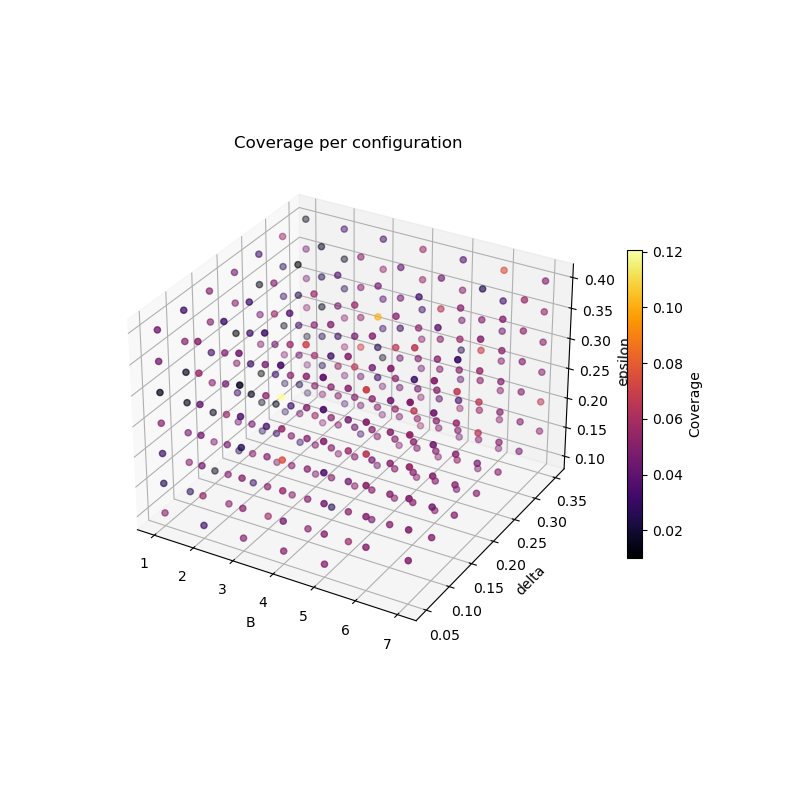

In [38]:
%matplotlib widget
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter3D(df["B"], df["delta"], df["epsilon"], marker="o", color=df["c_color"])
bar = fig.colorbar(mapper_cov, shrink=0.5)
bar.set_label("Coverage")
ax.set_xlabel('B')
ax.set_ylabel('delta')
ax.set_zlabel('epsilon')
ax.set_title("Coverage per configuration")

In [39]:
fig = sns.lineplot(x=df["B"], y=df["coverage"])
# plt.show()
fig = sns.lineplot(x=df["B"], y=df["precision"])
plt.show()
fig = sns.lineplot(x=df["B"], y=df["clock_time"])
plt.show()



AttributeError: 'PolyCollection' object has no attribute 'do_3d_projection'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))

AttributeError: 'PolyCollection' object has no attribute 'do_3d_projection'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))

In [ ]:
df.lineplot(df[])